# Summarize modality of DEGs 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

## Load modality analysis

In [2]:
df = pd.read_csv("../../_m/degs_with_modality.txt", sep='\t', index_col=0)
df.head(2)

,Length,gencodeID,ensemblID,gene_type,Symbol,EntrezID,Class,meanExprs,NumTx,gencodeTx,logFC,AveExpr,t,P.Value,adj.P.Val,B,Modality_AA,Modality_EA
ENSG00000272977.1,3754,ENSG00000272977.1,ENSG00000272977,sense_intronic,NaN,NaN,InGen,0.447451,1,ENST00000609475.1,1.743231,1.228220,15.822663,1.335410e-43,2.997861e-39,87.873753,2,1
ENSG00000182698.11,1140,ENSG00000182698.11,ENSG00000182698,protein_coding,RESP18,389075.0,InGen,2.821051,3,ENST00000470719.1|ENST00000392083.5|ENST000003...,2.730990,1.408244,15.346213,1.242416e-41,1.394549e-37,83.539264,2,2


### Subset and select columns of interest

In [3]:
degs = df[(df['adj.P.Val'] <= 0.05)].loc[:, ['gencodeID', 'Symbol', 'logFC', 't', 
                                             'adj.P.Val', 'Modality_AA', 'Modality_EA']].copy()
degs.head()

,gencodeID,Symbol,logFC,t,adj.P.Val,Modality_AA,Modality_EA
ENSG00000272977.1,ENSG00000272977.1,NaN,1.743231,15.822663,2.997861e-39,2,1
ENSG00000182698.11,ENSG00000182698.11,RESP18,2.730990,15.346213,1.394549e-37,2,2
ENSG00000233913.7,ENSG00000233913.7,NaN,-2.239773,-15.183986,4.321772e-37,2,2
ENSG00000068654.15,ENSG00000068654.15,POLR1A,0.223029,14.959146,2.709253e-36,1,1
ENSG00000204894.4,ENSG00000204894.4,NaN,-3.613206,-14.466756,2.203634e-34,2,2


## Summarize modalities

### AA

In [4]:
degs.groupby(['Modality_AA']).size()

Modality_AA
1    3772
2    1253
3      71
4       6
6       1
dtype: int64

### EA

In [5]:
degs.groupby(['Modality_EA']).size()

Modality_EA
1    4005
2    1031
3      55
4      12
dtype: int64

## Plot histogram

### AA

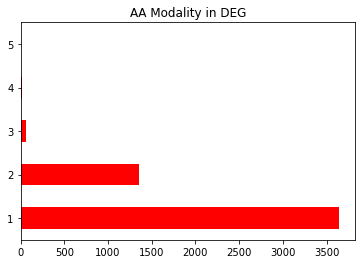

In [7]:
ax = degs['Modality_AA'].value_counts().plot(kind='barh', facecolor='red', title='AA Modality in DEG')
ax.figure.savefig("AA_modality.pdf")
ax.figure.savefig("AA_modality.png")
ax.figure.savefig("AA_modality.svg")

### EA

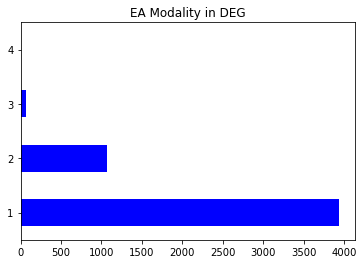

In [8]:
ax = degs['Modality_EA'].value_counts().plot(kind='barh', facecolor='blue', title='EA Modality in DEG')
ax.figure.savefig("EA_modality.pdf")
ax.figure.savefig("EA_modality.png")
ax.figure.savefig("EA_modality.svg")

## Categories of modality

In [15]:
table = [[np.sum((degs['Modality_AA'] == 1) & (degs["Modality_EA"] == 1)), # One vs One (grouping)
          np.sum((degs['Modality_AA'] == 1) & (degs["Modality_EA"] >= 2))], # One AA vs multiple EA
         [np.sum((degs['Modality_AA'] >= 2) & (degs["Modality_EA"] == 1)), # Multiple AA vs One EA
          np.sum((degs['Modality_AA'] >= 2) & (degs["Modality_EA"] >= 2))]] # Multiple vs Multiple
table

[[3221, 551], [784, 547]]

In [16]:
fisher_exact(table)

(4.078593188636616, 2.1532876913659984e-83)

In [12]:
mod_cat = [];
for index, row in degs.iterrows():
    if row['Modality_AA'] == 1:
        if row['Modality_EA'] == 1:
            mod_cat.append("One_vs_One")
        else:
            mod_cat.append("One_vs_Multi")
    else:
        if row['Modality_EA'] == 1:
            mod_cat.append("Multi_vs_One")
        else:
            mod_cat.append("Multi_vs_Multi")
degs["Modal_Category"] = mod_cat

In [14]:
degs.groupby("Modal_Category").size()

Modal_Category
Multi_vs_Multi     547
Multi_vs_One       784
One_vs_Multi       551
One_vs_One        3221
dtype: int64

In [ ]:
degs["Tissue"] = "DLPFC"
degs.to_csv("diffExpr_AAvsEA_annotated_modality.tsv", sep='\t')